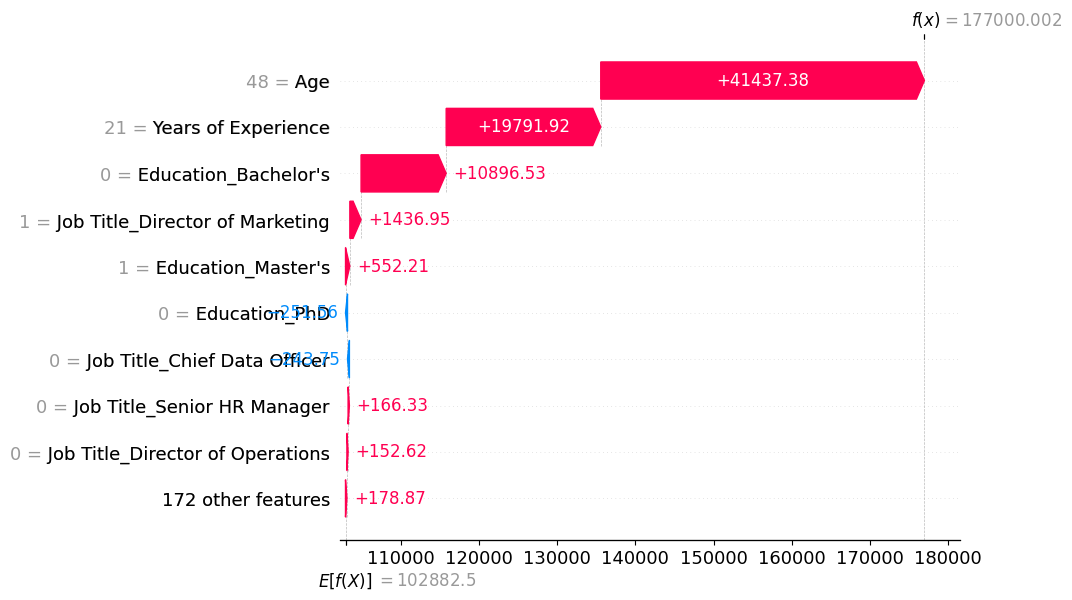


Original predicted salary: ₹177000.00
Predicted salary after +2 years of experience: ₹175450.00

Original test sample features:
Age                                     48.0
Gender                                  Male
Education                           Master's
Job Title              Director of Marketing
Years of Experience                     21.0
Name: 329, dtype: object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import shap
import matplotlib.pyplot as plt

# 1. Load your dataset
df = pd.read_csv("Salary Data.csv")

# 2. Clean column names
df.columns = df.columns.str.strip()
df.rename(columns={'Education Level': 'Education'}, inplace=True)

# 3. Handle missing values
df.dropna(inplace=True)

X = df.drop("Salary", axis=1)
y = df["Salary"]

categorical_cols = ['Gender', 'Education', 'Job Title']
numerical_cols = ['Age', 'Years of Experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train_orig, X_test_orig, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([ohe_feature_names, numerical_cols])

explainer = shap.Explainer(model, X_train, feature_names=all_feature_names)
shap_values = explainer(X_test[:5])

shap.plots.waterfall(shap_values[0])

example_idx = 0
original = X_test[example_idx].copy()
modified = original.copy()

experience_idx = X_encoded.shape[1] - 1
modified[experience_idx] += 2


original_salary = model.predict([original])[0]
new_salary = model.predict([modified])[0]

print(f"\nOriginal predicted salary: ₹{original_salary:.2f}")
print(f"Predicted salary after +2 years of experience: ₹{new_salary:.2f}")


print("\nOriginal test sample features:")
print(X_test_orig.iloc[example_idx])
